In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ["MSFT", "AMZN", "GOOG"]
df = pd.DataFrame()

for a in assets:
    df[a] = wb.DataReader(a, data_source="yahoo", start="2010-1-1")["Adj Close"]

In [3]:
df.tail()

,MSFT,AMZN,GOOG
Date,,,
2022-06-14,244.490005,102.309998,2143.879883
2022-06-15,251.759995,107.669998,2207.810059
2022-06-16,244.970001,103.660004,2132.719971
2022-06-17,247.649994,106.220001,2157.310059
2022-06-21,253.740005,110.022102,2250.560059


<AxesSubplot:xlabel='Date'>

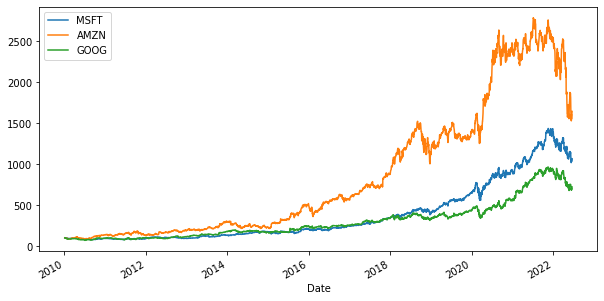

In [4]:
(df / df.iloc[0] * 100).plot(figsize=(10,5))

In [5]:
logReturns = np.log(df / df.shift(1))

In [6]:
logReturns.mean() * 250

MSFT    0.188605
AMZN    0.223089
GOOG    0.157418
dtype: float64

In [7]:
logReturns.cov() * 250

,MSFT,AMZN,GOOG
MSFT,0.064687,0.044725,0.042297
AMZN,0.044725,0.103268,0.049616
GOOG,0.042297,0.049616,0.068555


In [8]:
logReturns.corr()

,MSFT,AMZN,GOOG
MSFT,1.000000,0.547220,0.635162
AMZN,0.547220,1.000000,0.589681
GOOG,0.635162,0.589681,1.000000


In [9]:
nAsset = len(assets)

In [10]:
weights = np.random.random(nAsset)
weights /= np.sum(weights)
weights

array([0.48987355, 0.1709732 , 0.33915326])

 Expected PortFolio Return:

In [11]:
np.sum(weights * logReturns.mean()) * 250

0.18392347657055613

Expected PortFolio Variance:

In [12]:
pVar = np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))
pVar

0.05372835078389157

Expected PortFolio Volatility:

In [13]:
np.sqrt(pVar)

0.23179376778483837

In [42]:
pFolioReturns = []
pFolioVolatility = []
weightsArray = []

for x in range(1000):
    weights = np.random.random(nAsset)
    weights /= np.sum(weights)
    weightsArray.append(weights)
    pFolioReturns.append(np.sum(weights * logReturns.mean()) * 250)
    pFolioVolatility.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

pFolioReturns = np.array(pFolioReturns)
pFolioVolatility = np.array(pFolioVolatility)
weightsArray = np.array(weightsArray)

In [43]:
pFolios = pd.DataFrame({"return": pFolioReturns, "volatility": pFolioVolatility})

In [63]:
pFolioW = pd.DataFrame(weightsArray * 100, columns=logReturns.columns.tolist())
pFolioW

,MSFT,AMZN,GOOG
0,8.900895,41.385060,49.714045
1,54.472145,18.427152,27.100703
2,43.092551,34.389111,22.518338
3,48.904108,26.139790,24.956102
4,17.101928,34.727862,48.170210
...,...,...,...
995,20.082979,23.960442,55.956579
996,31.133200,31.299238,37.567562
997,76.254065,7.477287,16.268649
998,26.931536,38.503989,34.564475


Text(0, 0.5, 'Expected Return')

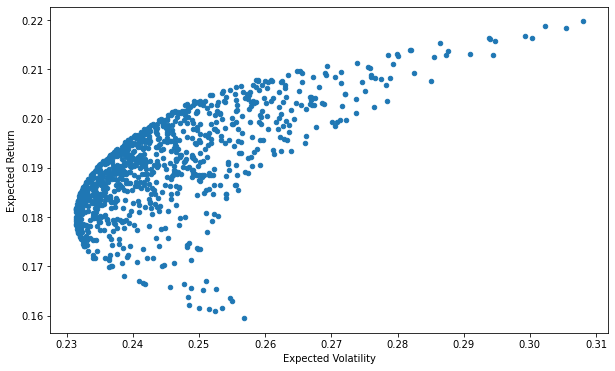

In [66]:
pFolios.plot(x="volatility", y="return", kind="scatter", figsize=(10,6))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")